In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure


In [12]:
df=pd.read_csv('C:/Users/Syber Computers/Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

<Axes: >

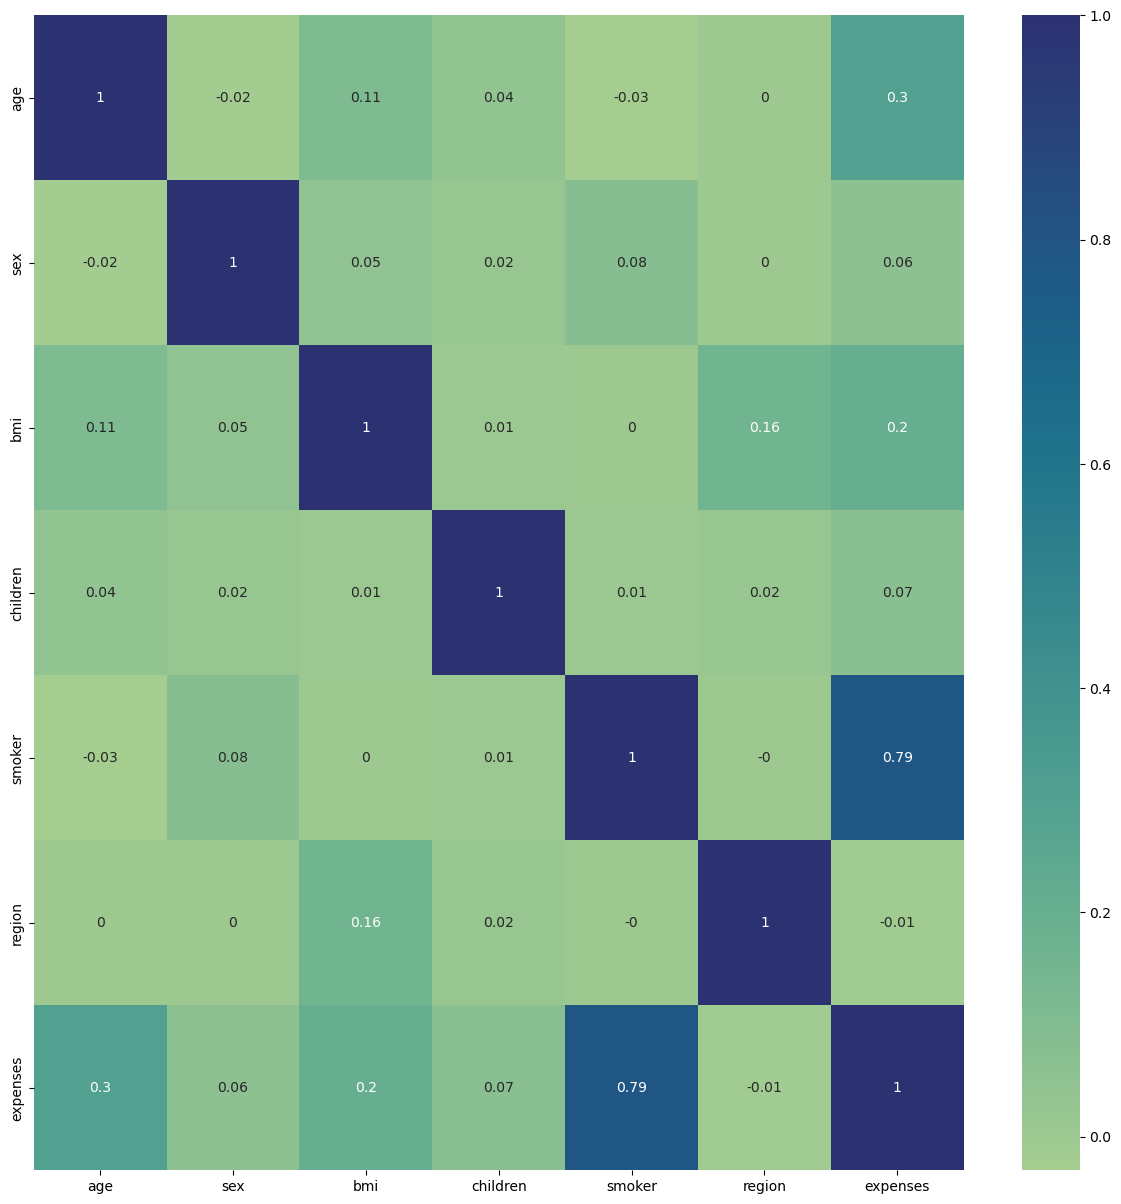

In [15]:
corr=df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='crest')

Text(0.5, 1.0, 'Distribution of expenses for non-smokers')

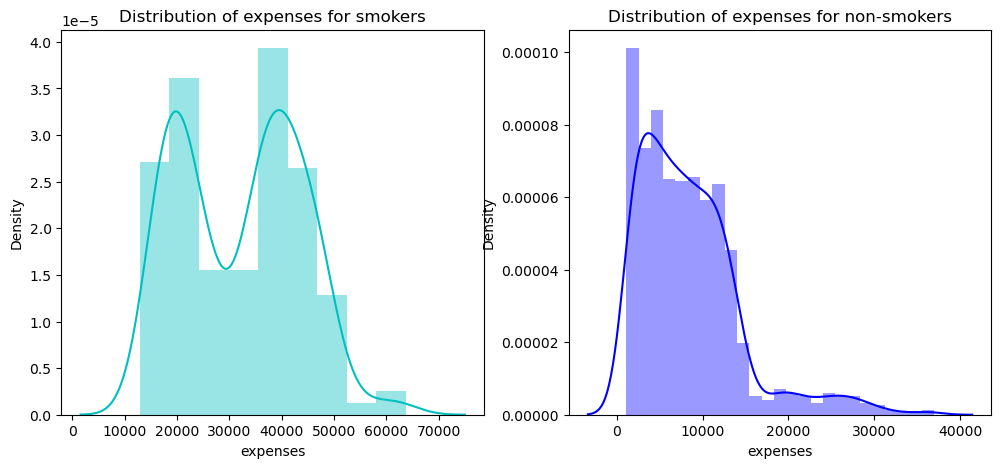

In [20]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["expenses"],color='c',ax=ax)
ax.set_title('Distribution of expenses for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['expenses'],color='b',ax=ax)
ax.set_title('Distribution of expenses for non-smokers')

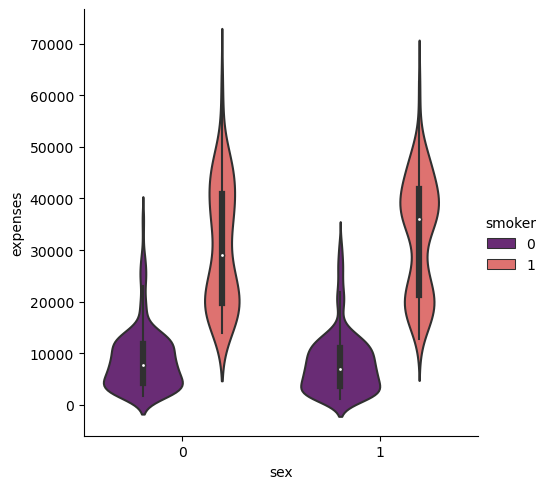

In [21]:
sns.catplot(x="sex",y="expenses",hue="smoker",
            kind="violin",data=df,palette='magma')

In [22]:
plot_columns=['age','bmi']

In [23]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,25))
    for i, col in enumerate(columns):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

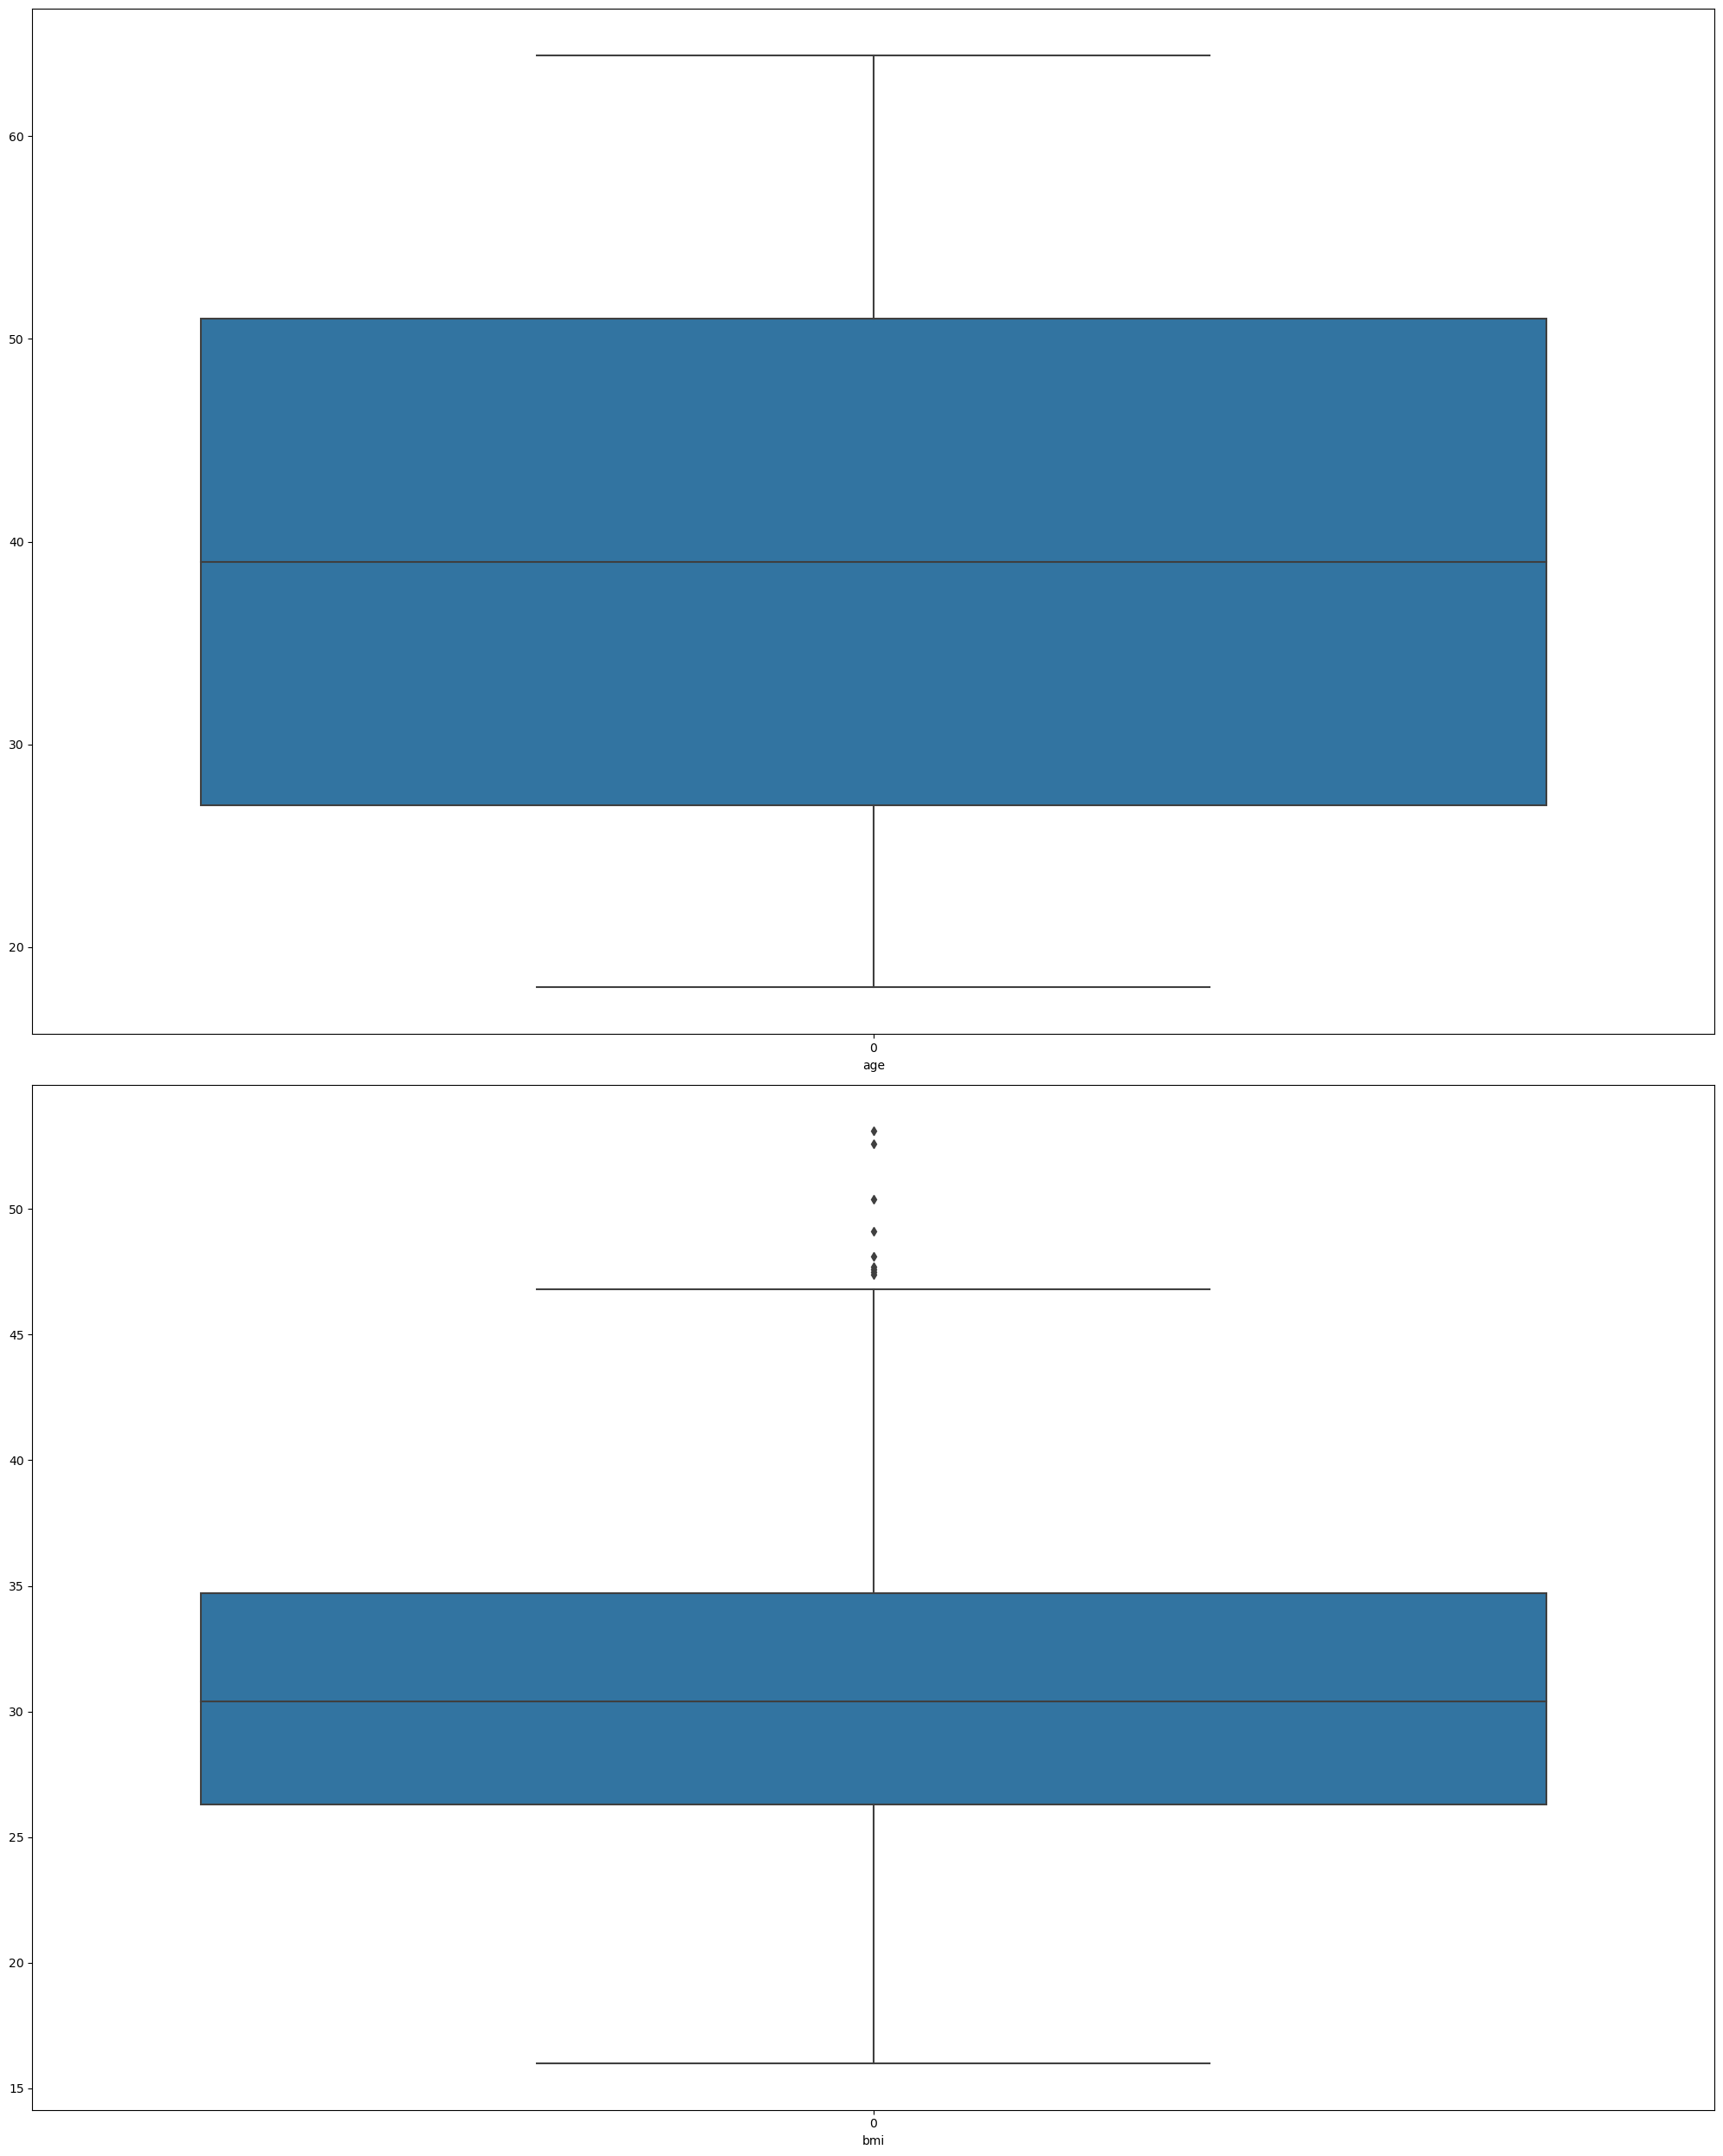

In [24]:
box_plot(df,plot_columns)

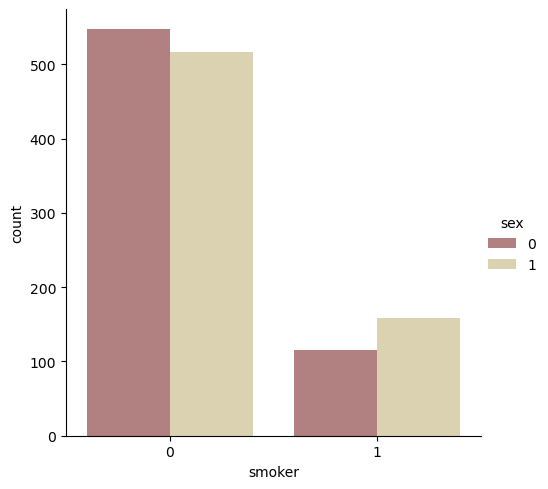

In [26]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

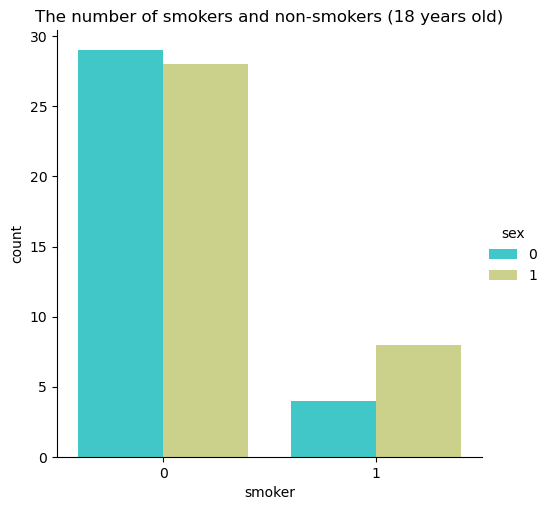

In [27]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<Axes: xlabel='smoker', ylabel='expenses'>

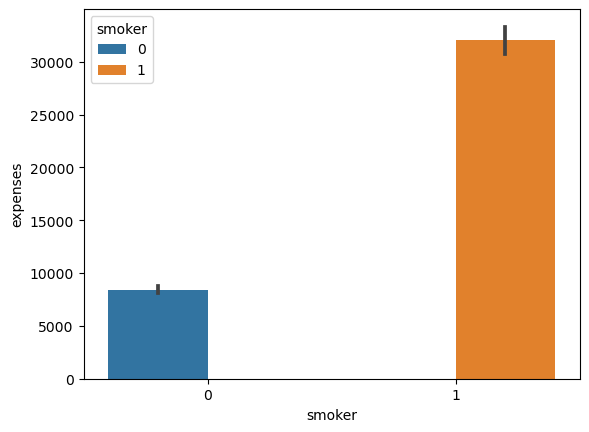

In [28]:
sns.barplot(data=df, x="smoker", y="expenses",hue="smoker")

Text(0.5, 1.0, 'Smokers and non-smokers')

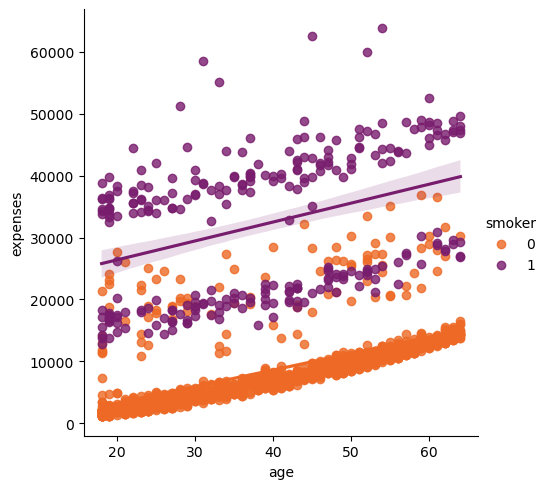

In [30]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=df, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

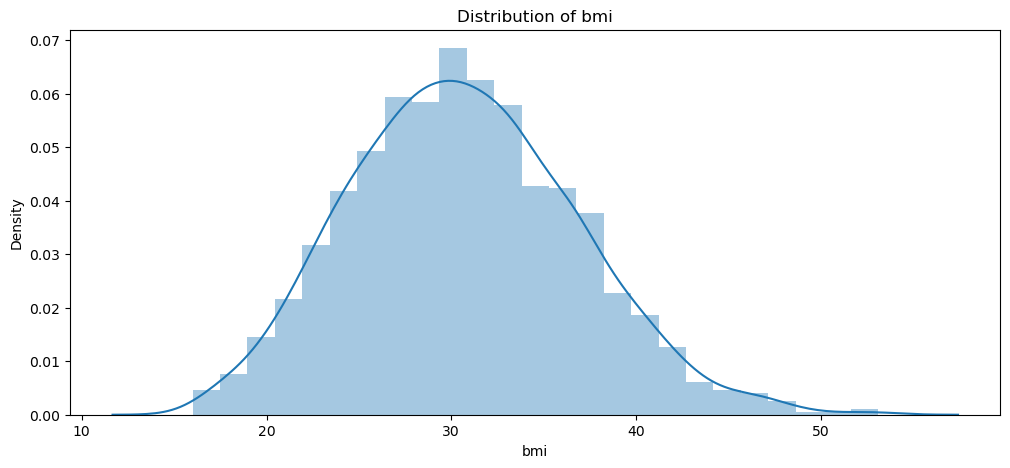

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"])

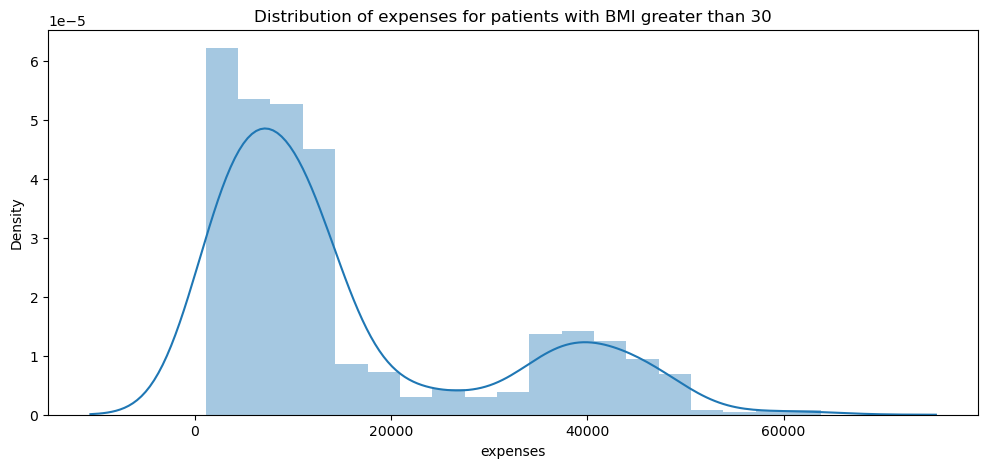

In [33]:
plt.figure(figsize=(12,5))
plt.title("Distribution of expenses for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['expenses'])

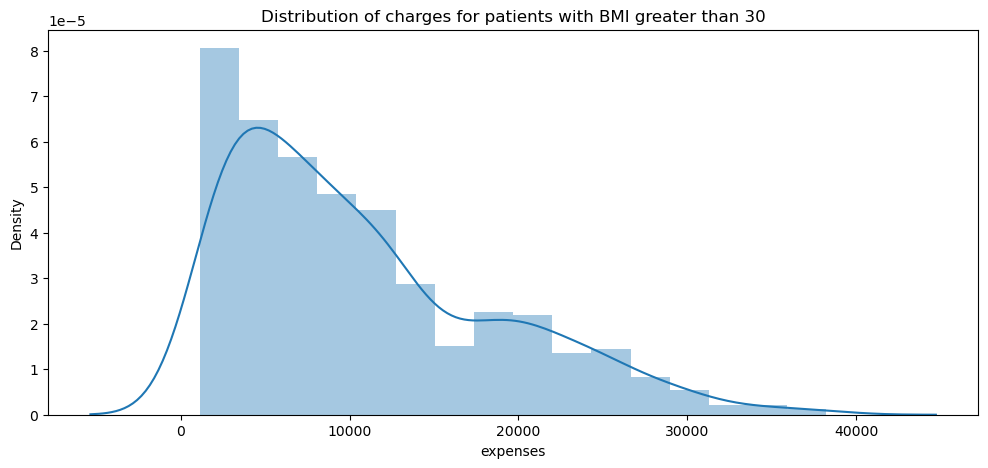

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi < 30)]['expenses'])


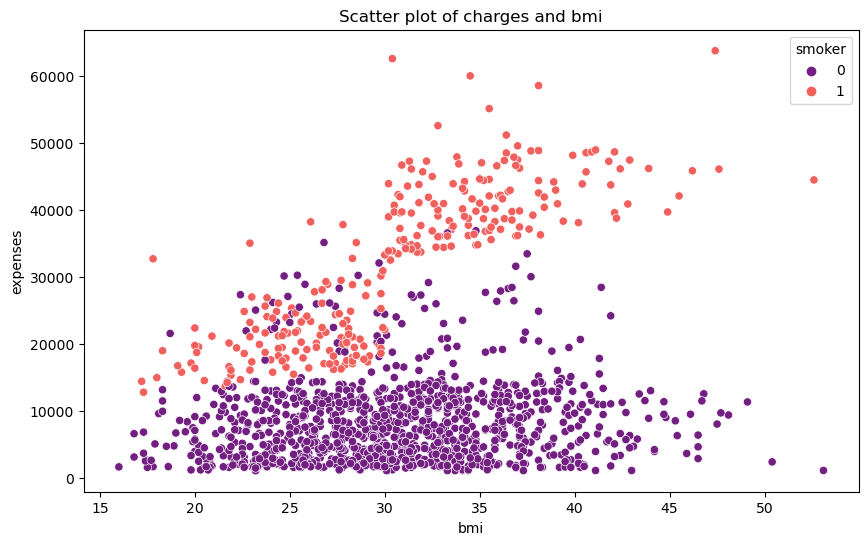

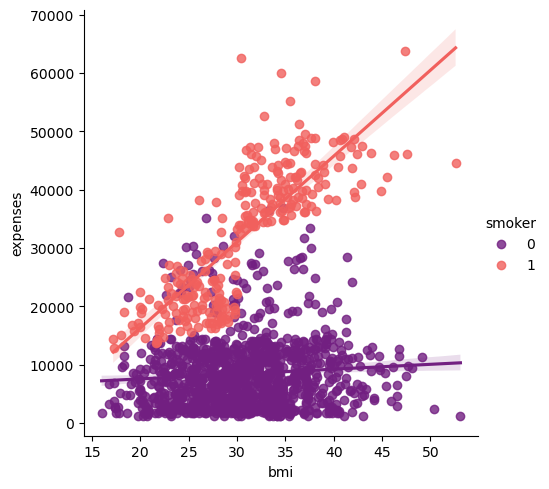

In [35]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette = 'magma')

In [45]:
#preparing the data
!pip3 install xgboost
import xgboost

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
X=df.drop(['expenses'],axis=1)
y=df.expenses
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape , X_test.shape

((1070, 6), (268, 6))

In [49]:
y_train.shape ,y_test.shape

((1070,), (268,))

In [50]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[-0.10030367, -1.00562329, -0.29509423, -0.05610472, -0.5       ,
         0.46475805],
       [-1.44807203,  0.99440816,  0.71337216, -0.88988322,  2.        ,
         1.37222359],
       [-0.3131092 ,  0.99440816, -0.59763415, -0.05610472, -0.5       ,
         1.37222359],
       ...,
       [ 0.39624257, -1.00562329, -0.91698184,  0.77767378, -0.5       ,
        -1.35017302],
       [ 1.17652952, -1.00562329, -0.34551755, -0.88988322, -0.5       ,
        -1.35017302],
       [-1.44807203,  0.99440816, -1.01782848, -0.05610472, -0.5       ,
         1.37222359]])

In [51]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [52]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,2514.028000,19530847.739000,0.846000
XGBoost,2567.568000,20746739.066000,0.837000
Linear Regression,4265.109000,34488427.213000,0.728000
K-nearest Neighbors,3082.234000,37806697.404000,0.702000
Decision Tree,3003.689000,38255483.280000,0.699000
